# Algoritmo Genético

Desenvolvido por Alexandre Mundim.

# Importação de Pacotes e Bibliotecas

Importação de pacotes com funções matemáticas, operações matriciais e plotagens.

In [4]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Funções Básicas e Auxiliares

Grupo de funções básicas, responsáveis pelos processos de criação dos intervalos das variáveis e conversão entre binários e decimais.

Ao receber do usuário os intervalos e seus respectivos números de bits, são criados dois dicionários. Estes são utilizados para a conversão entre números decimal e binário e vice-versa. Os dicionários possuem os números binários em strings.

As demais funções desse grupo também fazem parte do processo de conversão, mas recebem arrays em suas entradas e fazem as transformações para strings e vice-versa.

In [2]:
def criação_intervalo(input_variaveis): # Array com intervalos inferior, superior e número de bits 
    
    input_variaveis = np.asmatrix(input_variaveis)
    intervalos = []
    intervalos_invertidos = []

    for variavel in input_variaveis:
        max_intervalo = float(np.asarray(variavel[:, :2]).max())
        min_intervalo = float(np.asarray(variavel[:, :2]).min())
        n_bits = int(variavel[:, 2:])
        
        # Criação de bins
        
        tamanho_intervalo = max_intervalo - min_intervalo + 1
        qtd_numeros_representaveis = 2**n_bits
        tamanho_bin = (tamanho_intervalo)/qtd_numeros_representaveis
        lista_bins = np.linspace(min_intervalo, max_intervalo, qtd_numeros_representaveis).tolist()
        
        
        # Criação de lista de conversor decimal-binario:

        lista_binarios = []
        formato_binario = (str('#0'+str(n_bits+2)+'b'))
        i = 0
        while i < qtd_numeros_representaveis:
            lista_binarios.append(format(i, formato_binario))
            i = i + 1

        intervalo = dict(zip(lista_bins, lista_binarios))
        intervalo_invertido = {v: k for k, v in intervalo.items()}
        
        intervalos.append(intervalo)
        intervalos_invertidos.append(intervalo_invertido)
        
    return intervalos, intervalos_invertidos

In [3]:
def conversor_dec_bin(input_valores, input_dicionarios):
    valores_convertidos = []

    for dicionario, linha in enumerate(input_valores):
        array = [*input_dicionarios[dicionario]]
        max_intervalo = max(array)
        min_intervalo = min(array)

        array = np.asarray(array)

        valores_convertidos_por_variavel = []

        for valor in linha:

            if (valor > max_intervalo) or (valor < min_intervalo):
                raise ValueError('Erro. Valor fora do intervalo')

            idx = (np.abs(array - valor)).argmin()

            valores_convertidos_por_variavel.append(input_dicionarios[dicionario].get(array[idx]))

        valores_convertidos.append(valores_convertidos_por_variavel)
        
    return valores_convertidos

In [4]:
def conversor_bin_dec(input_binarios, input_dicionarios):
    
    input_dicionarios = intervalos_invertidos

    binarios_convertidos = []

    for idx, linha in enumerate(input_binarios):

        binarios_convertidos_por_variavel = []

        for binario in linha:
            formato_binario = str('#0'+str(len([*input_dicionarios[idx]][1]))+'b')
            binario = int(str(binario), 2)
            binario = format(binario, formato_binario)

            if (2**(len(binario)-2)) > (len(input_dicionarios[idx])):
                raise ValueError('Erro. Valor fora do intervalo')
            else: 
                binarios_convertidos_por_variavel.append(input_dicionarios[idx].get(binario))

        binarios_convertidos.append(binarios_convertidos_por_variavel)

    return binarios_convertidos

In [5]:
def conversor_bin_vetor(input_strings_binarias):
    
    vetores_binarios = []

    for linha in input_strings_binarias:
        vetores_binarios_por_variavel = []

        for string_binaria in linha:
            vetores_binarios_por_variavel.append([int(caractere) for caractere in str(string_binaria)[2:]])

        vetores_binarios.append(vetores_binarios_por_variavel)
    
    return vetores_binarios

In [6]:
def conversor_vetor_bin(input_vetores_binario):
    
    valores_binarios = []

    for linha in input_vetores_binario:
        valores_binarios_por_linha = []
        for valor in linha:
            valores_binarios_por_linha.append(('0b'+''.join(str(bit) for bit in valor)))

        valores_binarios.append(valores_binarios_por_linha)

    return valores_binarios

In [7]:
def decimal2binario(input_vetores_decimais, input_intervalos):
    strings_binarias = conversor_dec_bin(input_vetores_decimais, input_intervalos)
    vetores_binarios = conversor_bin_vetor(strings_binarias)
    return vetores_binarios

In [8]:
def binario2decimal(vetores_binarios, input_intervalos_invertidos):
    strings_binarias = conversor_vetor_bin(vetores_binarios)
    valores_decimais = conversor_bin_dec(strings_binarias, input_intervalos_invertidos)
    return valores_decimais

Em seguida, apresentamos funções auxiliares utilizadas no algoritmo genético. Essas incluem funções para transposição de matrizes, plots, etc.

In [9]:
def transposta(input_matrix):
    matrix_array = np.asarray(input_matrix)
    return matrix_array.T

In [10]:
# Função geral: gera vetor transposto da população e aplica função selecionada

def funções(input_função, input_pop_decimal):
    
    pop_decimal_transposta = transposta(input_pop_decimal)
    
    return input_função(pop_decimal_transposta)

In [11]:
# QUAL A FINALIDADE DA FUNÇÃO? 
def flat_pop(input_pop):

    n_individuo = 0
    pop_flat = []

    while n_individuo < len(input_pop[0]):
        individuo = []
        n_variavel = 0
        while n_variavel < len(input_pop):
            for bit in (input_pop[n_variavel][n_individuo]):
                individuo.append(bit)
            n_variavel = n_variavel + 1
        
        n_individuo = n_individuo + 1
        pop_flat.append(individuo)

    return pop_flat

In [12]:
#QUAL A FINALIDADE DA FUNÇÃO?
def unflat_pop(input_pop_aux):

    unflat_pop = []
    unflat_variavel = []

    for idx_individuo, individuo in enumerate(input_pop_aux):
        count_acum = 0
        for idx, variavel in enumerate(vetor_n_bits):
            unflat_variavel = []
            count_aux = 0
            while count_aux < variavel:
                unflat_variavel.append(input_pop_aux[idx_individuo][count_acum])
                count_aux = count_aux + 1
                count_acum = count_acum + 1

            unflat_pop.append(unflat_variavel)

    output_pop = []

    for idx, variavel in enumerate(vetor_n_bits):
        armazenamento_por_variavel = []
        count = idx
        while count < len(unflat_pop):
            armazenamento_por_variavel.append(unflat_pop[count])
            count = count + len(vetor_n_bits)

        output_pop.append(armazenamento_por_variavel)

    return output_pop

In [13]:
def plot_resultados(resultados, media_resultados):
    
    # Resultado Geral
    plt.plot(resultados, 'blue')
        
    plt.title('Resultado Geral')
    plt.xlabel('Geração')
    plt.ylabel('f(x)')
    plt.legend(['Melhor Performance da Geração'])
    plt.rcParams['figure.figsize'] = (20,10)

    plt.figure()
    
    # Resultado Médio
    plt.plot(media_resultados, 'black')

    plt.title('Resultado Médio')
    plt.xlabel('Geração')
    plt.ylabel('f(x)')
    plt.legend(['Performance Média da Geração'])
    plt.rcParams['figure.figsize'] = (20,10)

    plt.figure()

# Iniciação da População

In [14]:
def iniciar_população(input_n_individuos, input_vetor_n_bits, input_seed):

    random.seed(input_seed)
    pop = []
    n_var = len(input_vetor_n_bits)

    for linha in range(0, input_n_individuos):
        individuo = []
        for coluna in range(0, sum(input_vetor_n_bits)):
            aleatorio = random.uniform(0, 1)
            individuo.append(round(aleatorio))
        pop.append(individuo)

    # Divide a população da seguinte forma:
    # pop_por_variavel = [[indiviuos_variavel_1], [indiviuos_variavel_2], [indiviuos_variavel_3], [indiviuos_variavel_n]]

    bits_inicio = [0] + input_vetor_n_bits[:-1]
    bits_termino = np.cumsum(input_vetor_n_bits).tolist()

    pop_por_variavel = [l.tolist() for l in np.split(np.array(pop), bits_termino, axis=1)][:-1]

    return pop_por_variavel

# Métodos de Seleção

In [15]:
def seleção(input_método_seleção, input_fx, input_tipo_otimização):
    return input_método_seleção(input_fx, input_tipo_otimização)

In [16]:
def método_seleção_roleta(input_fx, input_tipo_otimização):
    
    roleta_soma = sum(input_fx)
    roleta_soma = np.array(roleta_soma)
    roleta_média = np.mean(input_fx)
    roleta_máximo = np.max(input_fx)
    
    if input_tipo_otimização == 'max': # Se max
        fi_sobre_roleta_soma = input_fx/roleta_soma
        prob_se_max = fi_sobre_roleta_soma
        roleta_probabilidade_acum = np.cumsum(prob_se_max)  
    else: # Se min
        prob_se_min = ((roleta_soma/input_fx)/(sum(roleta_soma/input_fx)))
        roleta_probabilidade_acum = np.cumsum(prob_se_min)  

    índices_pais = []

    # Performa os trials:
    n_giro_roleta = 0
    while n_giro_roleta < n_individuos:
        idx = (np.abs(roleta_probabilidade_acum - random.uniform(0, 1))).argmin()
        índices_pais.append(idx)
        n_giro_roleta = n_giro_roleta + 1

    return índices_pais

In [17]:
def método_seleção_roleta_log(input_fx, input_tipo_otimização):
    
    roleta_soma = sum(np.log(input_fx))
    roleta_soma = np.array(roleta_soma)
    roleta_média = np.mean(np.log(input_fx))
    roleta_máximo = np.max(np.log(input_fx))
    
    if input_tipo_otimização == 'max': # Se max
        fi_sobre_roleta_soma = np.log(input_fx)/roleta_soma
        prob_se_max = fi_sobre_roleta_soma
        roleta_probabilidade_acum = np.cumsum(prob_se_max)  
    else: # Se min
        prob_se_min = ((roleta_soma/np.log(input_fx))/(sum(roleta_soma/np.log(input_fx))))
        roleta_probabilidade_acum = np.cumsum(prob_se_min)  

    índices_pais = []

    # Performa os trials:
    n_giro_roleta = 0
    while n_giro_roleta < n_individuos:
        idx = (np.abs(roleta_probabilidade_acum - random.uniform(0, 1))).argmin()
        índices_pais.append(idx)
        n_giro_roleta = n_giro_roleta + 1

    return índices_pais

In [18]:
def método_seleção_torneio(input_fx, input_tipo_otimização):
    # Gera dois arrays com números aleatórios   
    # Compara qual indivíduo tem a melhor performance conforme tipo de otimização
    
    pais = np.random.randint(len(input_fx), size=(2, len(input_fx)))
    idx_a = pais[0, :]
    idx_b = pais[1, :]
    fx_a = np.array(input_fx)[idx_a.astype(int)]
    fx_b = np.array(input_fx)[idx_b.astype(int)]

    # se max:
    if input_tipo_otimização == 'max':
        selecionados = np.array(fx_a) > np.array(fx_b)
    # se min:
    else:
        selecionados = np.array(fx_a) < np.array(fx_b)

    índices_pais = []
    for idx, item in enumerate(selecionados):
        if item == True:
            índices_pais.append(idx_a[idx])
        else:
            índices_pais.append(idx_b[idx])
            
    return índices_pais

In [19]:
def metodo_selecao_torneio(input_fx, input_tipo_otimizacao):
    # Gera dois arrays com números aleatórios   
    # Compara qual individuo tem a melhor performance conforme tipo de otimizacao
    
    n_torneio = 0
    n_torneios = 2
    
    while n_torneio < n_torneios:
    
        if n_torneio == 0:
            pais = np.random.randint(len(input_fx), size=(2, len(input_fx)))
            idx_a = pais[0, :]
            idx_b = pais[1, :]
        else:
            idx_a = np.random.permutation(indices_pais)
            idx_b = np.random.permutation(indices_pais)
            
        fx_a = np.array(input_fx)[idx_a.astype(int)]
        fx_b = np.array(input_fx)[idx_b.astype(int)]

        # se max:
        if input_tipo_otimizacao == 'max':
            selecionados = np.array(fx_a) > np.array(fx_b)
        # se min:
        else:
            selecionados = np.array(fx_a) < np.array(fx_b)

        indices_pais = []
        for idx, item in enumerate(selecionados):
            if item == True:
                indices_pais.append(idx_a[idx])
            else:
                indices_pais.append(idx_b[idx])
                
        n_torneio = n_torneio + 1

    return indices_pais

# Métodos de Cruzamento

In [20]:
def cruzamento(input_método_cruzamento, input_índices_pop_aux, input_pop, input_probabilidade_cruzamento):
    return input_método_cruzamento(input_índices_pop_aux, input_pop, input_probabilidade_cruzamento)

In [21]:
def cruzamento_um_ponto(input_índices_pop_aux, input_pop, input_probabilidade_cruzamento):

    pais = np.random.randint(len(input_índices_pop_aux), size=(2, int(len(input_índices_pop_aux)/2)))

    idx_a = pais[0, :]
    idx_b = pais[1, :]

    pop_matriz = flat_pop(input_pop)

    len_individuo = len(pop_matriz[0])

    pop_aux = []
    cruzamento = 0
        
    while cruzamento < (len(idx_a)):

        # Definições do cruzamento
        ponto_cruzamento = int(random.uniform(1, len_individuo)) # Sorteio de ponto de corte. Na nossa implementação, cada cruzamento tem um ponto de corte diferente
        probabilidade_cruzamento = random.uniform(0,1) # Se maior ou igual que a input_probabilidade_cruzamento, define se haverá ou não cruzamento
        
        # Define pais
        pai_a = pop_matriz[idx_a[cruzamento]]
        pai_b = pop_matriz[idx_b[cruzamento]]

        novo_individuo = []

        # POSSIBILIDADE A: Se houver cruzamento
        if input_probabilidade_cruzamento >= probabilidade_cruzamento:   

            # Executa o cruzamento
            filho_a = pai_a[:ponto_cruzamento] + pai_b[ponto_cruzamento:]
            filho_b = pai_b[:ponto_cruzamento] + pai_a[ponto_cruzamento:]

            pop_aux.append(filho_a)
            pop_aux.append(filho_b)

        # POSSIBILIDADE B: Se não houver cruzamento passa os pais adiante
        else:

            pop_aux.append(pai_a)
            pop_aux.append(pai_b)

        cruzamento = cruzamento + 1 
    return pop_aux

In [22]:
def cruzamento_uniforme(input_índices_pop_aux, input_pop, input_probabilidade_cruzamento):

    pais = np.random.randint(len(input_índices_pop_aux), size=(2, int(len(input_índices_pop_aux)/2)))

    idx_a = pais[0, :]
    idx_b = pais[1, :]

    pop_matriz = flat_pop(input_pop)

    len_individuo = len(pop_matriz[0])

    pop_aux = []
    cruzamento = 0
        
    while cruzamento < (len(idx_a)):

        # Definições do cruzamento
#         ponto_cruzamento = int(random.uniform(1, len_individuo)) # Sorteio de ponto de corte. Na nossa implementação, cada cruzamento tem um ponto de corte diferente
        probabilidade_cruzamento = random.uniform(0,1) # Se maior ou igual que a input_probabilidade_cruzamento, define se haverá ou não cruzamento
        
        # Define pais
        pai_a = pop_matriz[idx_a[cruzamento]]
        pai_b = pop_matriz[idx_b[cruzamento]]

        # POSSIBILIDADE A: Se houver cruzamento
        if input_probabilidade_cruzamento >= probabilidade_cruzamento:   

            # Executa o cruzamento
            mascara_1 = np.random.choice([0, 1], size=len(pai_a))
            mascara_2 = np.logical_not(mascara_1)
        
            filho_a = np.array(pai_a)*mascara_1 + np.array(pai_b)*mascara_2
            filho_b = np.array(pai_b)*mascara_1 + np.array(pai_a)*mascara_2

            pop_aux.append(filho_a)
            pop_aux.append(filho_b)

        # POSSIBILIDADE B: Se não houver cruzamento passa os pais adiante
        else:

            pop_aux.append(pai_a)
            pop_aux.append(pai_b)

        cruzamento = cruzamento + 1 
    return pop_aux

# Métodos de Mutação

In [23]:
def mutação(input_método_mutação, input_pop_aux, input_probabilidade_mutação):
    return input_método_mutação(input_pop_aux, input_probabilidade_mutação)

In [24]:
def mutação_um_ponto(input_pop_aux, input_probabilidade_mutação):
    # Seleciona quantidade de indivíduos igual à probabilidade de mutação (1)
    # Seleciona bit aleatório de variável aleatória (2)
    # Inverte bit (3)
    # Insere indivíduo na população (4)
    
    # (1)
    n_mutações = 0
    len_indivíduo = len(pop_aux[0])

    while n_mutações < round(input_probabilidade_mutação*len(pop_aux)):

        # (2)
        índice_indivíduo_aleatório = int(random.uniform(0, len(pop_aux)))

        # Seleção do bit aleatório
        posição_bit_aleatório = int(random.uniform(0, len_indivíduo))

        valor_bit_aleatório = pop_aux[índice_indivíduo_aleatório][posição_bit_aleatório]

        # (3)
        if valor_bit_aleatório == 0:
            novo_bit = 1
        else:
            novo_bit = 0

        # (4)
        pop_aux[índice_indivíduo_aleatório][posição_bit_aleatório] = novo_bit

        n_mutações = n_mutações + 1
        
    return pop_aux

In [25]:
# def mutação_um_ponto(input_pop_aux, input_probabilidade_mutação):
#     # Para cada bit de cada indivíduo (1)
#     # Gera número aleatório entre 0 e 1 (2)
#     # Se número aleatório for menor ou igual à probabilidade de mutação (3)
#     # Inverte bit (4)
#     # Insere indivíduo na população (5)

#     i = 0
#     while i < len(input_pop_aux):
#         b = 0
#         while b < len(input_pop_aux[i]):
#             # (2) e (3)
#             if random.uniform(0, 1) <= input_probabilidade_mutação:
#                 # (4) e (5)
#                 input_pop_aux[i][b] = int(not(input_pop_aux[i][b]))
#             b = b + 1
#         i = i + 1
#     return input_pop_aux

In [26]:
def reverse_sequencing_mutation(input_pop_aux, input_probabilidade_mutação):
    
    pop_aux = []
    len_indivíduo = len(input_pop_aux[0])
    
    for individuo_original in input_pop_aux:
        
#         print('===')
        
        bit_inicial = random.randint(0, len_indivíduo - 1)
        qtd_maxima_bits = round(input_probabilidade_mutação*len_indivíduo)
        
#         print(individuo_original, bit_inicial, qtd_maxima_bits)
        
        if (bit_inicial + qtd_maxima_bits) < len_indivíduo - 1:
            bit_final = random.randint(bit_inicial + 1, bit_inicial + qtd_maxima_bits + 1)
#             print('A', bit_final)
        else:
            bit_final = len_indivíduo
#             print('B', bit_final)
            
#         print(bit_final)
            
        segmento = individuo_original[bit_inicial : bit_final]
        segmento_invertido = segmento[::-1]
        
        novo_individuo = individuo_original[0:bit_inicial] + segmento_invertido + individuo_original[bit_final:len_indivíduo]
#         print('SAÍDA: ', segmento, segmento_invertido, novo_individuo)
    
        pop_aux.append(novo_individuo)
    
    return pop_aux

# Métodos de Elitismo

In [27]:
def elitismo(input_fx_elite, input_pop_matriz_elite, input_fx_aux, input_pop_aux, input_tipo_otimização, input_qtd_individuos_elitismo):
    
    # f(x) elite
    concat_fx = input_fx_elite + input_fx_aux
    índices_elite_aux = np.argsort(concat_fx)
    
    concat_pop = input_pop_matriz_elite + input_pop_aux
    
    if input_tipo_otimização == 'max':
        índices_elite_final = índices_elite_aux[-int(len(concat_pop)-input_qtd_individuos_elitismo):]

    else:
        índices_elite_final = índices_elite_aux[:int(len(concat_pop)-input_qtd_individuos_elitismo)]
    
    pop_matriz_final = []
    
    for índice_elite_final in índices_elite_final:
        pop_matriz_final.append(concat_pop[índice_elite_final])
    
    return pop_matriz_final

# Funções de Teste

Grupo de funções utilizadas para validação do algoritmo.

In [28]:
def função_sphere(input_pop_decimal_transposta):
    y = []
    for individuo in input_pop_decimal_transposta:
        y.append(sum(np.square(individuo)))
        
    return y

In [29]:
def função_rastringin(input_pop_decimal_transposta):

    y = []
 
    for individuo in input_pop_decimal_transposta:
        rastringin = 0
        termo_1 = 10*len(individuo)
        termo_2 = 0
        for xi in individuo:
            termo_2 = termo_2 + (xi**2)-10*(math.cos(2*xi*(math.pi)))
            
        rastringin = termo_1 + termo_2
        y.append(rastringin)
        
    return y

In [30]:
def função_rosenbrock(input_pop_decimal_transposta):

    y = []
    
    for individuo in input_pop_decimal_transposta:
        
        rosenbrock = 0
        
        for idx, xi in enumerate(individuo):         
            if idx == (len(individuo)-1):
                break
            
            rosenbrock = rosenbrock + (100*(((xi**2)-individuo[idx+1])**2)+((1-xi)**2))
        
        y.append(rosenbrock)
        
    return y

In [31]:
def função_de_jong_step(input_pop_decimal_transposta):

    y = []
    
    for individuo in input_pop_decimal_transposta:
        
        de_jong_step = 0
        
        for xi in individuo:
            de_jong_step = de_jong_step + abs(round(xi)) # O módulo (abs) foi utilizado para ajustar a função para minimização
        
        y.append(de_jong_step)
        
    return y

In [32]:
def função_de_jong_step_func_4(input_pop_decimal_transposta):

    y = []
    
    for individuo in input_pop_decimal_transposta:
        de_jong_step_func_4 = 0
        termo_1 = 0
        termo_2 = random.gauss(0, 1)
        for idx, xi in enumerate(individuo):
            termo_1 = termo_1 + idx*(xi**4)
        
        
        de_jong_step_func_4 = termo_1 + termo_2
        y.append(de_jong_step_func_4)
        
    return y

In [33]:
def função_schaffer(input_pop_decimal_transposta):

    y = []
    
    for individuo in input_pop_decimal_transposta:
        shaffer = 0
        parentesis = 0
        for xi in individuo:
            parentesis = parentesis + xi**2
            
        termo_1 = parentesis**0.25
        termo_2 = (((math.sin(50*(parentesis**0.1)))**2)+1)
        schaffer = (termo_1 * termo_2)
        
        y.append(schaffer)
        
    return y    

In [34]:
def função_7(input_pop_decimal_transposta):

    y = []
 
    for individuo in input_pop_decimal_transposta:
        função_7 = 0
        parentesis = 0
        termo_1 = 0
        termo_2 = 1
        for xi in individuo:
            parentesis = parentesis + xi**2
            termo_2 = termo_2*(math.cos(20*math.pi*xi))
        
        termo_1 = parentesis/2
        função_7 = termo_1 - termo_2 + 2
        y.append(função_7)
        
    return y

In [35]:
def função_schwefel(input_pop_decimal_transposta):
    
    y = []
    
    for individuo in input_pop_decimal_transposta:
        
        schwefel = 0
        
        for xi in individuo:         
            schwefel = schwefel + ((xi + 0.5)**2)
        
        y.append(schwefel)
        
    return y

In [36]:
def função_schwefel_12(input_pop_decimal_transposta):

    y = []
 
    for individuo in input_pop_decimal_transposta:
        schwefel = 0
        for idx, xi in enumerate(individuo):
            schwefel = schwefel + (-xi*(math.sin(math.sqrt(abs(xi)))))
        
        y.append(schwefel/len(individuo)) # A divisão não faz parte da função, mas o seu resultado ótimo é um produto da quantidade de variáveis por indivíduo por -418.98288
#         y.append(schwefel)
    return y

In [37]:
def função_griewangk(input_pop_decimal_transposta):

    y = []
 
    for individuo in input_pop_decimal_transposta:
        griewangk = 0
        termo_1 = 0
        termo_2 = 1
        for idx, xi in enumerate(individuo):
            termo_1 = termo_1 + (xi**2)/4000
            termo_2 = termo_2 * math.cos(xi/(math.sqrt(idx + 1)))
            
        griewangk = 1 + termo_1 - termo_2
        y.append(griewangk)
        
    return y

In [38]:
def função_bohachevsky(input_pop_decimal_transposta):

    y = []
 
    for individuo in input_pop_decimal_transposta:
        bohachevsky = 0
        termo_1 = 0
        termo_2 = 0
        for idx, xi in enumerate(individuo):
            if idx == (len(individuo)-1):
                break
            termo_1 = (xi**2 + 2*((individuo[idx + 1])**2)-0.3*math.cos(3*math.pi*xi))
            termo_2 = (-0.4*math.cos(4*math.pi*individuo[idx + 1]) + 0.7)
            bohachevsky = bohachevsky + (termo_1 + termo_2)

        y.append(bohachevsky)
        
    return y

In [39]:
def função_ackley(input_pop_decimal_transposta):

    y = []
 
    for individuo in input_pop_decimal_transposta:
        
        ackley = 0       
        soma_1 = 0
        soma_2 = 0
        
        for xi in individuo:
            soma_1 = soma_1 + xi**2
            soma_2 = soma_2 + math.cos(2*math.pi*xi)
            
        termo_1 = -20*math.exp(-0.2*(math.sqrt(1/len(individuo)*soma_1)))
        termo_2 = - math.exp((1/len(individuo))*soma_2)
        
        ackley = termo_1 + termo_2 + 20 + math.exp(1)
        y.append(ackley)
        
    return y

In [40]:
def função_schwefels_pro_12(input_pop_decimal_transposta):

    y = []
    schwefels = 0
    
    for individuo in input_pop_decimal_transposta:        
        
        schwefels = 0
        termo_2 = 0
        
        for idx, xi in enumerate(individuo):
            j = 0
            termo_1 = 0
            while j <= idx:
                termo_1 = termo_1 + individuo[j]
                j = j + 1
            termo_2 = termo_1**2
            schwefels = schwefels + termo_2
            
        y.append(schwefels)

    return y

# Validação do Código

A quantidade de variáveis, intervalo e número de bits é definido pelo usuário de acordo com o problema ou pelos atributos de cada função teste. 

In [5]:
# Intervalo e número de bits por variável:

variaveis = [[0, 1, 4],
             [0, 1, 4],
             [0, 1, 4],
             [0, 1, 4]]

Em seguida, os dicionários de conversão são criados.

intervalos, intervalos_invertidos = criação_intervalo(variaveis)

O usuário define, também, os demais parâmetros e ajustes do algoritmo.

In [43]:
# Parâmetros

vetor_n_bits = np.asarray(variaveis)[:, 2].astype(int)
n_individuos = 100
seed = 10
input_método_seleção = método_seleção_torneio
input_tipo_otimização = 'min'
probabilidade_cruzamento = .6
input_método_cruzamento = cruzamento_um_ponto # cruzamento_uniforme
# input_método_cruzamento = cruzamento_uniforme
input_método_mutação = mutação_um_ponto
# input_método_mutação = reverse_sequencing_mutation
input_probabilidade_mutação = 0.2
input_função = função_ackley

input_qtd_individuos_elitismo = int(.15*n_individuos)

n_gen = 0
n_max_gen = 100

Execução do algoritmo.

In [44]:
%%time

media_resultados = []
resultados = []

# Evolução

pop = iniciar_população(n_individuos, vetor_n_bits, seed)
pop_decimal = binario2decimal(pop, intervalos_invertidos)
fx_aux = funções(input_função, pop_decimal)

Wall time: 8.01 ms


O valor mínimo obtido foi 4.440892098500626e-16
Os valores numéricos de entrada que trouxeram esse resultado foram [0. 0. 0. 0.]
Wall time: 1.53 s


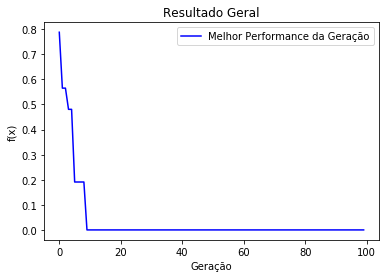

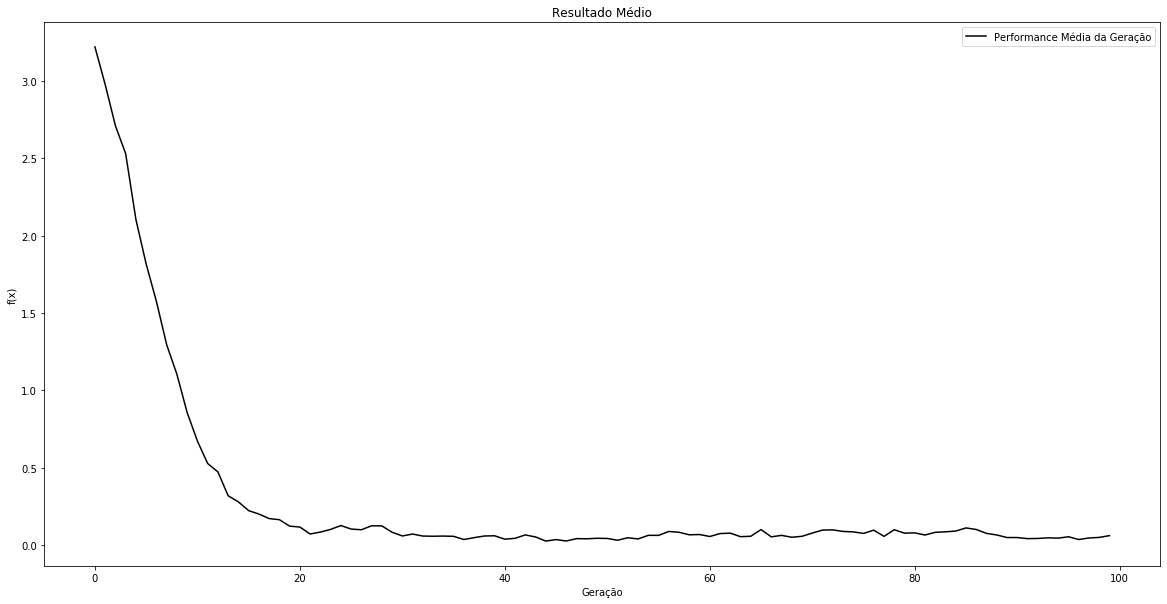

<Figure size 1440x720 with 0 Axes>

In [45]:
%%time

while n_gen < n_max_gen:
    
    # (1) Backup do resultado anterior (melhores indivíduos) para elitismo
    
    # Captura dos índices e resultados com melhor desempenho
    if input_tipo_otimização == 'max':
        fx_elite = sorted(fx_aux)[-int(input_qtd_individuos_elitismo):]
        índices_elite = np.argsort(fx_aux)[-int(input_qtd_individuos_elitismo):]
        
    else:
        fx_elite = sorted(fx_aux)[:int(input_qtd_individuos_elitismo)]
        índices_elite = np.argsort(fx_aux)[:int(input_qtd_individuos_elitismo)]
    
    # Captura dos elementos da população com melhor desempenho
    backup_pop_matriz = flat_pop(pop)
    backup_pop_matriz_elite = []
    
    for índice_elite in índices_elite:
        backup_pop_matriz_elite.append(backup_pop_matriz[índice_elite])   

    # (2) Seleção
    índices_pop_aux = seleção(input_método_seleção, fx_aux, input_tipo_otimização)
   
    # (3) Cruzamento
    pop_aux = cruzamento(input_método_cruzamento, índices_pop_aux, pop, probabilidade_cruzamento)
   
    # (4) Mutação
    pop_aux = mutação(input_método_mutação, pop_aux, input_probabilidade_mutação)
  
    # (5) Avaliação Parcial, pré-elitismo
    pop = unflat_pop(pop_aux)
    
    pop_decimal = binario2decimal(pop, intervalos_invertidos)
    fx_aux = funções(input_função, pop_decimal)
  
    # (6) Elitismo
    pop_matriz_final = elitismo(fx_elite, backup_pop_matriz_elite, fx_aux, pop_aux, input_tipo_otimização, input_qtd_individuos_elitismo)
   
    # (5) Avaliação Final, pós-elitismo
    pop = unflat_pop(pop_matriz_final)
    pop_decimal = binario2decimal(pop, intervalos_invertidos)
    fx_aux = funções(input_função, pop_decimal)
   
    # Resultados
    media_resultados.append(np.mean(fx_aux))
    if input_tipo_otimização == 'max':
        resultados.append(max(fx_aux))
        if n_gen == (n_max_gen - 1):
            print('O valor máximo obtido foi', max(fx_aux))
            print('Os valores numéricos de entrada que trouxeram esse resultado foram', transposta(pop_decimal)[np.argmax(fx_aux)])
    else:
        resultados.append(min(fx_aux))
        if n_gen == (n_max_gen - 1):
            print('O valor mínimo obtido foi', min(fx_aux))
            print('Os valores numéricos de entrada que trouxeram esse resultado foram', transposta(pop_decimal)[np.argmin(fx_aux)])
    
    n_gen = n_gen + 1
    
plot_resultados(resultados, media_resultados)